# -- "Term Limits "  
## -- This document contains three sections: 
### -- (1) the part presented in class: this included precomputed pictures of graphs that I'd generated using networks.  
###        that re in the images subdirectory 
### -- (2) sqlite programming, which was used to create *.csv files that represented connected songs  
### -- (3) networkx programming, which reads the *.csv files and renders them in various ways using networkx  


# -- PRESENTATION BEGINS HERE 
# -- "Term Limits "  
## -- translate to a song-only graph 
## -- suppose songs must be connected by no more than 5 jumps 
## -- 15,000,000 connections! 
## -- 30% of all possible connections 
  <img src="images/Slide_1.PNG" alt="Minimum Common Artist Terms = 10 " >  


# - New restriction: Required Common Terms 
  <img src="images/Slide_3_1.PNG" alt="Minimum Common Artist Terms = 10 " >  


# - Set of new song graphs (Required Common Terms at 15 or 20)   <img src="images/Slide_4.PNG" alt="Minimum Common Artist Terms = 10 " >  


# - MinTerms Nodes, Edges, Transitivity 
 <table >  <tr>  <td>   Required Common Terms  </td>  <td>   Number of Nodes  </td>  <td>   Number of Edges  </td>  </tr>  <tr>  <td >   40  </td>  <td>   8444  </td>  <td>   15,069  </td>  </tr>  <tr>  <td>   35  </td>  <td>   8458  </td>  <td>   15,212  </td>  </tr>  <tr>  <td>   30  </td>  <td>   8485  </td>  <td>   17,192  </td>  </tr>  <tr>  <td>   25  </td>  <td>   8485  </td>  <td>   27,046  </td>  </tr>  <tr>  <td>   20  </td>  <td>   8717  </td>  <td>   82,214  </td>  </tr>  <tr>  <td>   15  </td>  <td>   9346  </td>  <td>   316,440  </td>  </tr>  <tr>  <td>   10  </td>  <td>   9346  </td>  <td>   1,238,226  </td>  </tr>  </table > 

## Required Common Terms = 40 
<table bgcolor="#eeeeee" width="300pt" >   <tr>   <td>   <img src="movie01/labels_and_colors_40_blue_2_red_1.png" alt="Minimum Common Artist Terms = 10 " >  
  </td>  </tr>  </table> 

## Required Common Terms = 35 
<table bgcolor="#eeeeee" width="300pt" >   <tr>   <td>   <img src="movie01/labels_and_colors_35_blue_2_red_1.png" alt="Minimum Common Artist Terms = 10 " >  
  </td>  </tr>  </table> 

## Required Common Terms = 30 
<table bgcolor="#eeeeee" width="300pt" >   <tr>   <td>   <img src="movie01/labels_and_colors_30_blue_2_red_1.png" alt="Minimum Common Artist Terms = 10 " >  
  </td>  </tr>  </table> 

## Required Common Terms = 25 
<table bgcolor="#eeeeee" width="300pt" >   <tr>   <td>   <img src="movie01/labels_and_colors_25_blue_2_red_1.png" alt="Minimum Common Artist Terms = 10 " >  
  </td>  </tr>  </table> 

## Required Common Terms = 20 
<table bgcolor="#eeeeee" width="300pt" >   <tr>   <td>   <img src="movie01/labels_and_colors_20_blue_2_red_1.png" alt="Minimum Common Artist Terms = 10 " >  
  </td>  </tr>  </table> 

## Required Common Terms = 15 
<table bgcolor="#eeeeee" width="300pt" >   <tr>   <td>   <img src="movie01/labels_and_colors_15_blue_2_red_1.png" alt="Minimum Common Artist Terms = 10 " >  
  </td>  </tr>  </table> 

## Required Common Terms = 10 
<table bgcolor="#eeeeee" width="300pt" >   <tr>   <td>   <img src="movie01/labels_and_colors_10_blue_2_red_1.png" alt="Minimum Common Artist Terms = 10 " >  
  </td>  </tr>  </table> 

# -- "Term Limits - Conclusions "  
## -- Certain values of Required Common Terms, can have a cluster 
## -- Recommendation   
### -- "Bohemian Rhapsody" (Gershwin)  
### --  => recommend "Doctrines" (Arthur Fiedler)  


In [1]:
##Here begins sqlite code that generatese *.csv files, that represent
## "networkx" graphs of songs

import pandas as pd 
import numpy as np 
import itertools as it 
import os 
import sqlite3 
import re 
import time 
import functools


In [2]:
dbpath = "/Users/Pierre/Bentley_rare_backup/ma755/sqlite/"
csvwritepath = "/Users/Pierre/"

conn_ma755_3 = sqlite3.connect(dbpath+'ma755_v3.db')

conn_ma755_3


In [3]:
#STEP 1
#decide how many terms you will require that artists share
gg_min_common_terms = 45
gg_min_common_terms 

45

In [4]:
#STEP 2
conn_ma755_3.execute("DELETE FROM graph_track_track")
conn_ma755_3.execute("DELETE FROM graph_track_track_stage ")
conn_ma755_3.commit()
#conn_ma755.close()


In [5]:
#STEP 3
# this inserts tracks by the same artist

conn_ma755_3.execute(
    " INSERT INTO graph_track_track_stage "+
    " select ta1.track_id track_id_1, ta2.track_id artist_id_2 "+
    " from track_artist_10k ta1, track_artist_10k ta2 "+
    " where "+
    "   ta1.artist_id = ta2.artist_id AND "+
    "   ta1.track_id > ta2.track_id ")


In [7]:
#STEP 4
# add to graph_track_track_stage songs connected by artist connected 
# more than *gg_required_shared_terms* terms

conn_ma755_3.execute( " INSERT INTO graph_track_track_stage "+
                   " SELECT ta1.track_id track_id_1, ta2.track_id track_id_2 "+
                   " FROM "+
                   " artist_artist_term_count aatc, "+
                   " track_artist_10k ta1, "+
                   " track_artist_10k ta2 "+
                   " WHERE "+
                   " aatc.counter > ? AND "+
                   " aatc.artist_id_1 = ta1.artist_id AND "+
                   " aatc.artist_id_2 = ta2.artist_id",[gg_min_common_terms] )



In [8]:
#STEP 5

#step 3.2: how many rows do we have?
#g_res = conn_ma755_3.execute("select count(*) from artist_artist_term_count")
g_res = conn_ma755_3.execute("select count(*) from graph_track_track_stage")
g_fra = g_res.fetchall()
g_res.close()
g_fra

[(15062,)]

In [9]:
#STEP 6

# map from graph_track_track_stage to graph_track_track, and assert uniqueness
conn_ma755_3.execute(
    "insert into graph_track_track "+
    " select distinct track_id_1, track_id_2 "+
    " from "+
    "   graph_track_track_stage "+
    " where "+
    "   track_id_1 > track_id_2 "
)

conn_ma755_3.commit()

'done'

'done'

In [10]:
#STEP 7: how many *distinct* rows?
#g_res = conn_ma755_3.execute("select count(*) from graph_track_track_stage")
g_res = conn_ma755_3.execute("select count(*) from graph_track_track")
g_fra = g_res.fetchall()
g_res.close()
g_fra


[(15061,)]

In [12]:
#STEP 8

g_res = conn_ma755_3.execute("select * from graph_track_track")
g_fra = g_res.fetchall()
g_res.close()
g_pd = pd.DataFrame(g_fra)
g_pd.to_csv(csvwritepath +"graph_"+str(gg_min_common_terms)+"_track_track_present.csv")
"done"


'done'

In [21]:
##
##
##
#NOW GO BACK TO STEP 1 (if you want more graphs) and change the value of gg_required_shared_terms
##
##
##
g_res = conn_ma755_3.execute("Select count(*) from graph_track_track")
g_fra = g_res.fetchall()
g_res.close()
g_fra

[(15061,)]

In [13]:
import networkx as nx
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline


In [14]:
ma755_path = "/Users/Pierre/Bentley/classes/MA755/csv/"
g_pd = pd.read_csv(ma755_path+"graph_30_track_track_weight.csv")


In [15]:
type(g_pd), len(g_pd.index), len(g_pd.keys())

(pandas.core.frame.DataFrame, 17192, 4)

In [16]:
g_tr1 = []
g_tr2 = []
for xx in g_pd.get("0"):
    g_tr1.append(xx)
for xx in g_pd.get("1"):
    g_tr2.append(xx)

G = nx.Graph()
for x in range(0,len(g_tr1)):
    G.add_edge(g_tr1[x], g_tr2[x])

G.number_of_nodes(), G.number_of_edges()

(8485, 17192)

In [17]:
import time
g_t1 = time.time()

spring_pos = nx.spring_layout(G)
g_t2 = time.time()
print("total time is "+str(g_t2-g_t1))
type(spring_pos)


total time is 764.4611268043518


dict

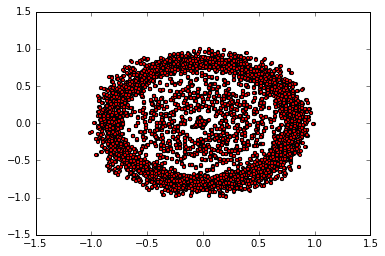

In [18]:
%matplotlib inline 
nx.draw_networkx(G, pos=spring_pos, with_labels = False, edge_color="#cccccc", node_color='red',node_size =10) #, edge_color=\"blue\")
